### Polynomial regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

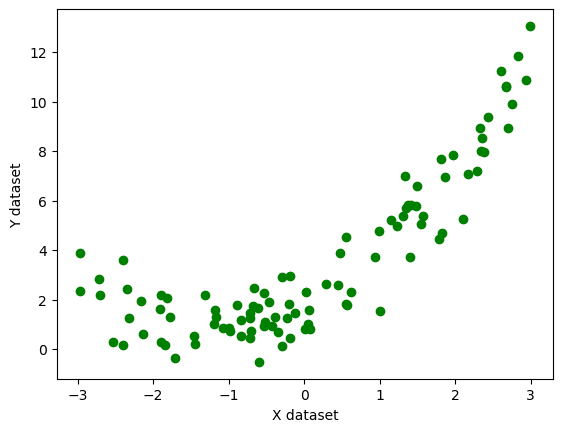

In [5]:
#use the same spaces
X =6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
#quardratic equation used - y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### simple linear regression

In [7]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [8]:
regression_1.fit(x_train,y_train)

LinearRegression()

In [9]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(x_test))
print(score)

0.6598806822095276


### Visualize

Text(0, 0.5, 'Y dataset')

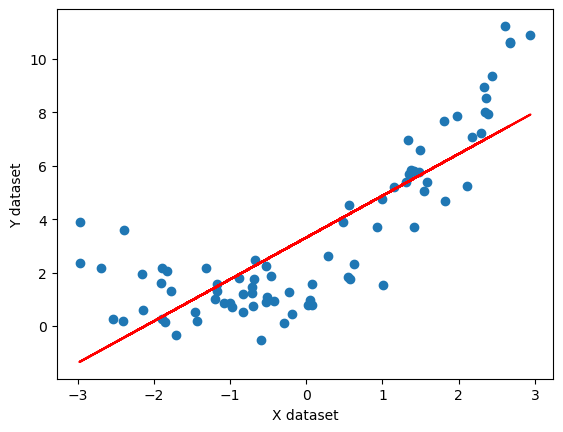

In [10]:
plt.plot(x_train,regression_1.predict(x_train),color='r')
plt.scatter(x_train,y_train)
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

### Apply polynomial transformation

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly=PolynomialFeatures(degree=2,include_bias=True)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [29]:
#x_train_poly   #below bias,x1,x1^2

In [16]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred=regression.predict(x_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9430581696504114


In [17]:
print(regression.coef_)

[[0.         1.48482488 0.6072718 ]]


In [18]:
print(regression.intercept_)

[1.76374303]


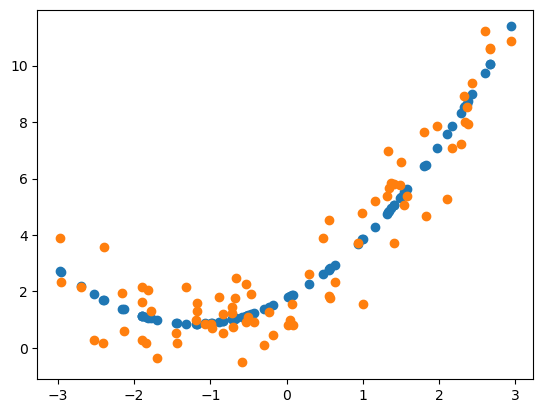

In [20]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [30]:
#prediction of new data
x_new=np.linspace(-3,3,200).reshape(200,1)
x_new_poly=poly.transform(x_new)

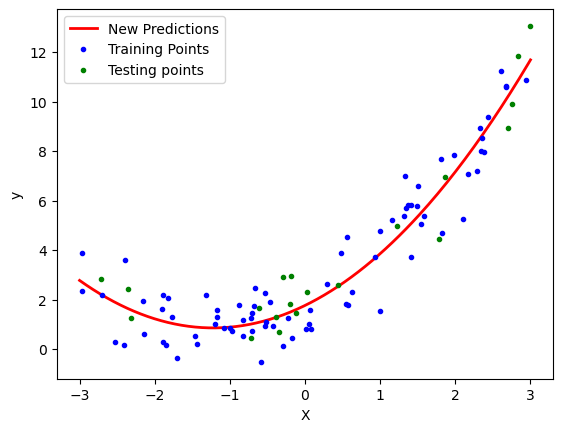

In [23]:
y_new=regression.predict(x_new_poly)
plt.plot(x_new,y_new,'r-',linewidth=2,label='New Predictions')
plt.plot(x_train,y_train,'b.',label='Training Points')
plt.plot(x_test,y_test,'g.',label='Testing points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Pipeline concept
- create a generic function, which whatever degree we assign,we'll be able to see for what kind of curve it will fitting
- combined both linear regression and polynomial regression to find the best model

In [24]:
from sklearn.pipeline import Pipeline

In [25]:
def poly_regression(degree):
    x_new=np.linspace(-3,3,200).reshape(200,1)
    #x_new_poly=poly.transform(x_new)
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        #combine above 2 factors/objects
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train)  #polynomial and fit of linear regression
    y_pred_new=poly_regression.predict(x_new)
    #plotting prediction line
    plt.plot(x_new,y_pred_new,'r',label='Degree ' + str(degree),linewidth=2)
    plt.plot(x_train,y_train,"b.",linewidth=3)
    plt.plot(x_test,y_test,"g. ",linewidth=3)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-4,4, 0, 10])
    plt.show()

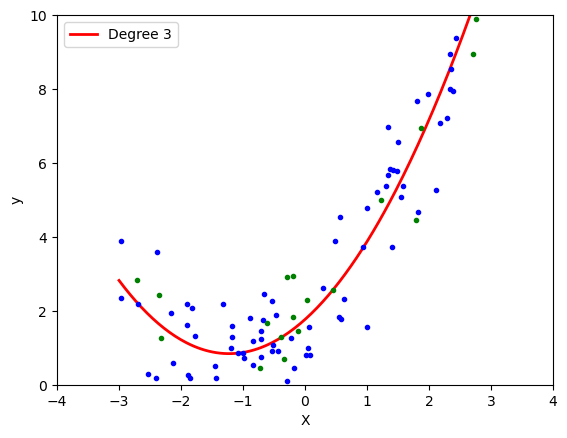

In [28]:
poly_regression(3)